## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

## Data Overview

Load and display the first few rows of the dataset.

In [2]:
# Load the dataset
data = pd.read_csv('../data/weatherHistory.csv')

# Display the first few rows
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Get information about the dataset (columns, data types, non-null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Descriptive Statistics

Display a statistical summary of the numerical columns.

In [4]:
# Get descriptive statistics of the numerical columns
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## Convert Date Format and Extract Day

Convert 'Formatted Date' to datetime format and extract the day.

In [5]:
# Convert 'Formatted Date' to datetime objects, handling errors by coercing invalid dates to NaT
data["Formatted Date"] = pd.to_datetime(data['Formatted Date'], format="%Y-%m-%d %H:%M:%S.%f %z", errors='coerce')

# Extract the date part from 'Formatted Date' and store it in a new 'Day' column
data["Day"] = data["Formatted Date"].apply(lambda x: x.strftime('%Y-%m-%d') if not pd.isna(x) else pd.NaT)

# Display the 'Day' column
data["Day"]

0        2006-04-01
1        2006-04-01
2        2006-04-01
3        2006-04-01
4        2006-04-01
            ...    
96448    2016-09-09
96449    2016-09-09
96450    2016-09-09
96451    2016-09-09
96452    2016-09-09
Name: Day, Length: 96453, dtype: object

## One-Hot Encoding

Convert the categorical 'Precip Type' column to numerical variables.

In [6]:
# One-hot encode the 'Precip Type' column
ohe = OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(data[['Precip Type']])
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Precip Type']))

# Concatenate the encoded DataFrame with the original data
data = pd.concat([data, encoded_df], axis=1)

# Display the data after one-hot encoding
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Day,Precip Type_rain,Precip Type_snow,Precip Type_nan
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01,1.0,0.0,0.0
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01,1.0,0.0,0.0
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01,1.0,0.0,0.0
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01,1.0,0.0,0.0
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09,1.0,0.0,0.0
96449,2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09,1.0,0.0,0.0
96450,2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09,1.0,0.0,0.0
96451,2016-09-09 22:00:00+02:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09,1.0,0.0,0.0


In [7]:
# Print the column names of the dataframe
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'Day', 'Precip Type_rain',
       'Precip Type_snow', 'Precip Type_nan'],
      dtype='object')

## Calculate Daily Averages

Calculate the daily averages for specified weather features.

In [8]:
# Calculate the daily average for selected weather features
avg_day = data.groupby('Day').mean(['Temperature (C)','Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                                    'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover','Pressure (millibars)',
                                    'Precip Type_rain', 'Precip Type_snow', 'Precip Type_nan'])
# Display the resulting dataframe
avg_day

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow,Precip Type_nan
Day,,,,,,,,,,,
2006-01-01,3.873148,-0.447222,0.818333,21.372750,142.041667,11.112354,0.0,1012.279167,1.000000,0.000000,0.0
2006-01-02,5.418519,2.042593,0.844583,17.551683,161.958333,8.956967,0.0,1010.131667,1.000000,0.000000,0.0
2006-01-03,2.319444,0.223843,0.898333,8.417617,248.541667,9.011975,0.0,1020.805000,1.000000,0.000000,0.0
2006-01-04,2.274074,-0.457407,0.905417,11.579925,46.916667,8.339129,0.0,981.826667,1.000000,0.000000,0.0
2006-01-05,2.698148,0.256481,0.948333,9.515100,140.375000,4.628750,0.0,935.988333,1.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,0.280324,-3.158102,0.890000,10.980200,185.875000,7.303362,0.0,1020.304583,0.500000,0.500000,0.0
2016-12-28,0.224306,-3.223611,0.890000,10.969467,186.166667,7.304704,0.0,1020.334583,0.458333,0.541667,0.0
2016-12-29,0.169676,-3.268056,0.889583,10.892992,186.041667,7.309400,0.0,1020.365833,0.458333,0.541667,0.0


## Temperature After Day

Create a new column representing the next day's temperature.

In [9]:
# Create a new column 'Temperature after day' which is the temperature of the next day
avg_day['Temperature after day'] = avg_day['Temperature (C)'].shift(-1)
# Display the dataframe
avg_day

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow,Precip Type_nan,Temperature after day
Day,,,,,,,,,,,,
2006-01-01,3.873148,-0.447222,0.818333,21.372750,142.041667,11.112354,0.0,1012.279167,1.000000,0.000000,0.0,5.418519
2006-01-02,5.418519,2.042593,0.844583,17.551683,161.958333,8.956967,0.0,1010.131667,1.000000,0.000000,0.0,2.319444
2006-01-03,2.319444,0.223843,0.898333,8.417617,248.541667,9.011975,0.0,1020.805000,1.000000,0.000000,0.0,2.274074
2006-01-04,2.274074,-0.457407,0.905417,11.579925,46.916667,8.339129,0.0,981.826667,1.000000,0.000000,0.0,2.698148
2006-01-05,2.698148,0.256481,0.948333,9.515100,140.375000,4.628750,0.0,935.988333,1.000000,0.000000,0.0,2.511806
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,0.280324,-3.158102,0.890000,10.980200,185.875000,7.303362,0.0,1020.304583,0.500000,0.500000,0.0,0.224306
2016-12-28,0.224306,-3.223611,0.890000,10.969467,186.166667,7.304704,0.0,1020.334583,0.458333,0.541667,0.0,0.169676
2016-12-29,0.169676,-3.268056,0.889583,10.892992,186.041667,7.309400,0.0,1020.365833,0.458333,0.541667,0.0,0.119444


In [10]:
# Remove the last row which contains NaN for 'Temperature after day'
avg_day = avg_day.iloc[:-1,:]
# Display the dataframe
avg_day

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow,Precip Type_nan,Temperature after day
Day,,,,,,,,,,,,
2006-01-01,3.873148,-0.447222,0.818333,21.372750,142.041667,11.112354,0.0,1012.279167,1.000000,0.000000,0.0,5.418519
2006-01-02,5.418519,2.042593,0.844583,17.551683,161.958333,8.956967,0.0,1010.131667,1.000000,0.000000,0.0,2.319444
2006-01-03,2.319444,0.223843,0.898333,8.417617,248.541667,9.011975,0.0,1020.805000,1.000000,0.000000,0.0,2.274074
2006-01-04,2.274074,-0.457407,0.905417,11.579925,46.916667,8.339129,0.0,981.826667,1.000000,0.000000,0.0,2.698148
2006-01-05,2.698148,0.256481,0.948333,9.515100,140.375000,4.628750,0.0,935.988333,1.000000,0.000000,0.0,2.511806
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26,0.340741,-3.083565,0.890000,10.974833,185.291667,7.303362,0.0,1020.272917,0.541667,0.458333,0.0,0.280324
2016-12-27,0.280324,-3.158102,0.890000,10.980200,185.875000,7.303362,0.0,1020.304583,0.500000,0.500000,0.0,0.224306
2016-12-28,0.224306,-3.223611,0.890000,10.969467,186.166667,7.304704,0.0,1020.334583,0.458333,0.541667,0.0,0.169676


## Correlation Heatmap

Visualize the relationships between weather features.

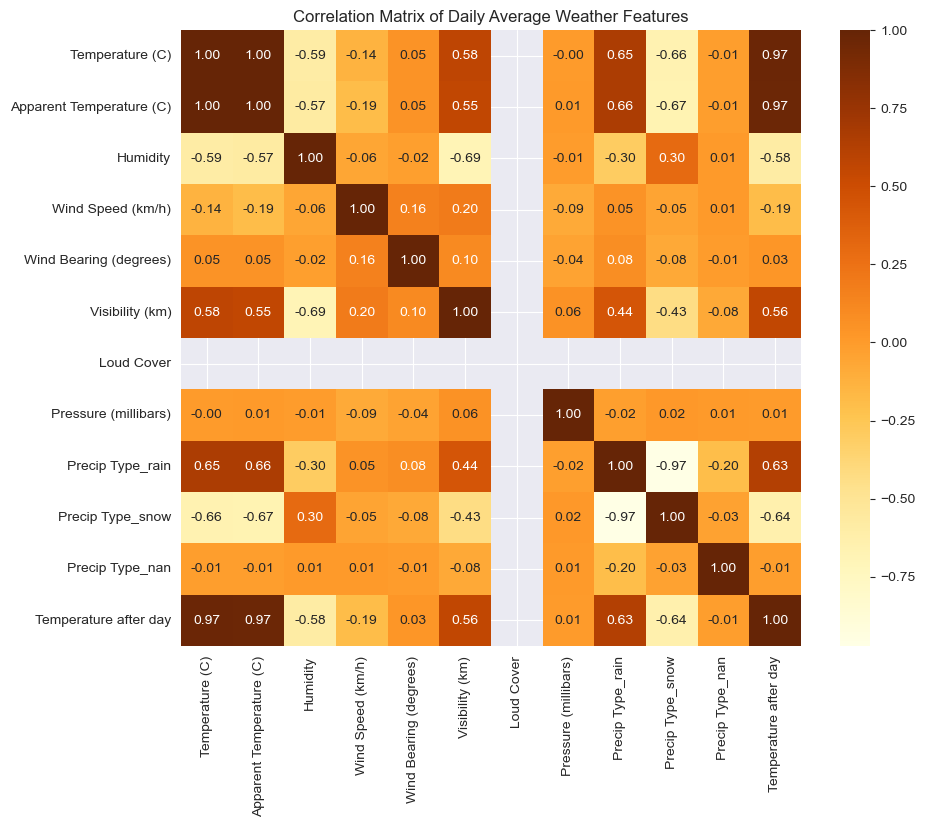

In [11]:
# Create a heatmap to visualize the correlation between different features
plt.figure(figsize=(10, 8))
sns.heatmap(avg_day.corr(), annot=True, cmap='YlOrBr', fmt='.2f')
plt.title('Correlation Matrix of Daily Average Weather Features')
plt.show()

## Pair Plot

Visualize the relationships between variables used in regression.

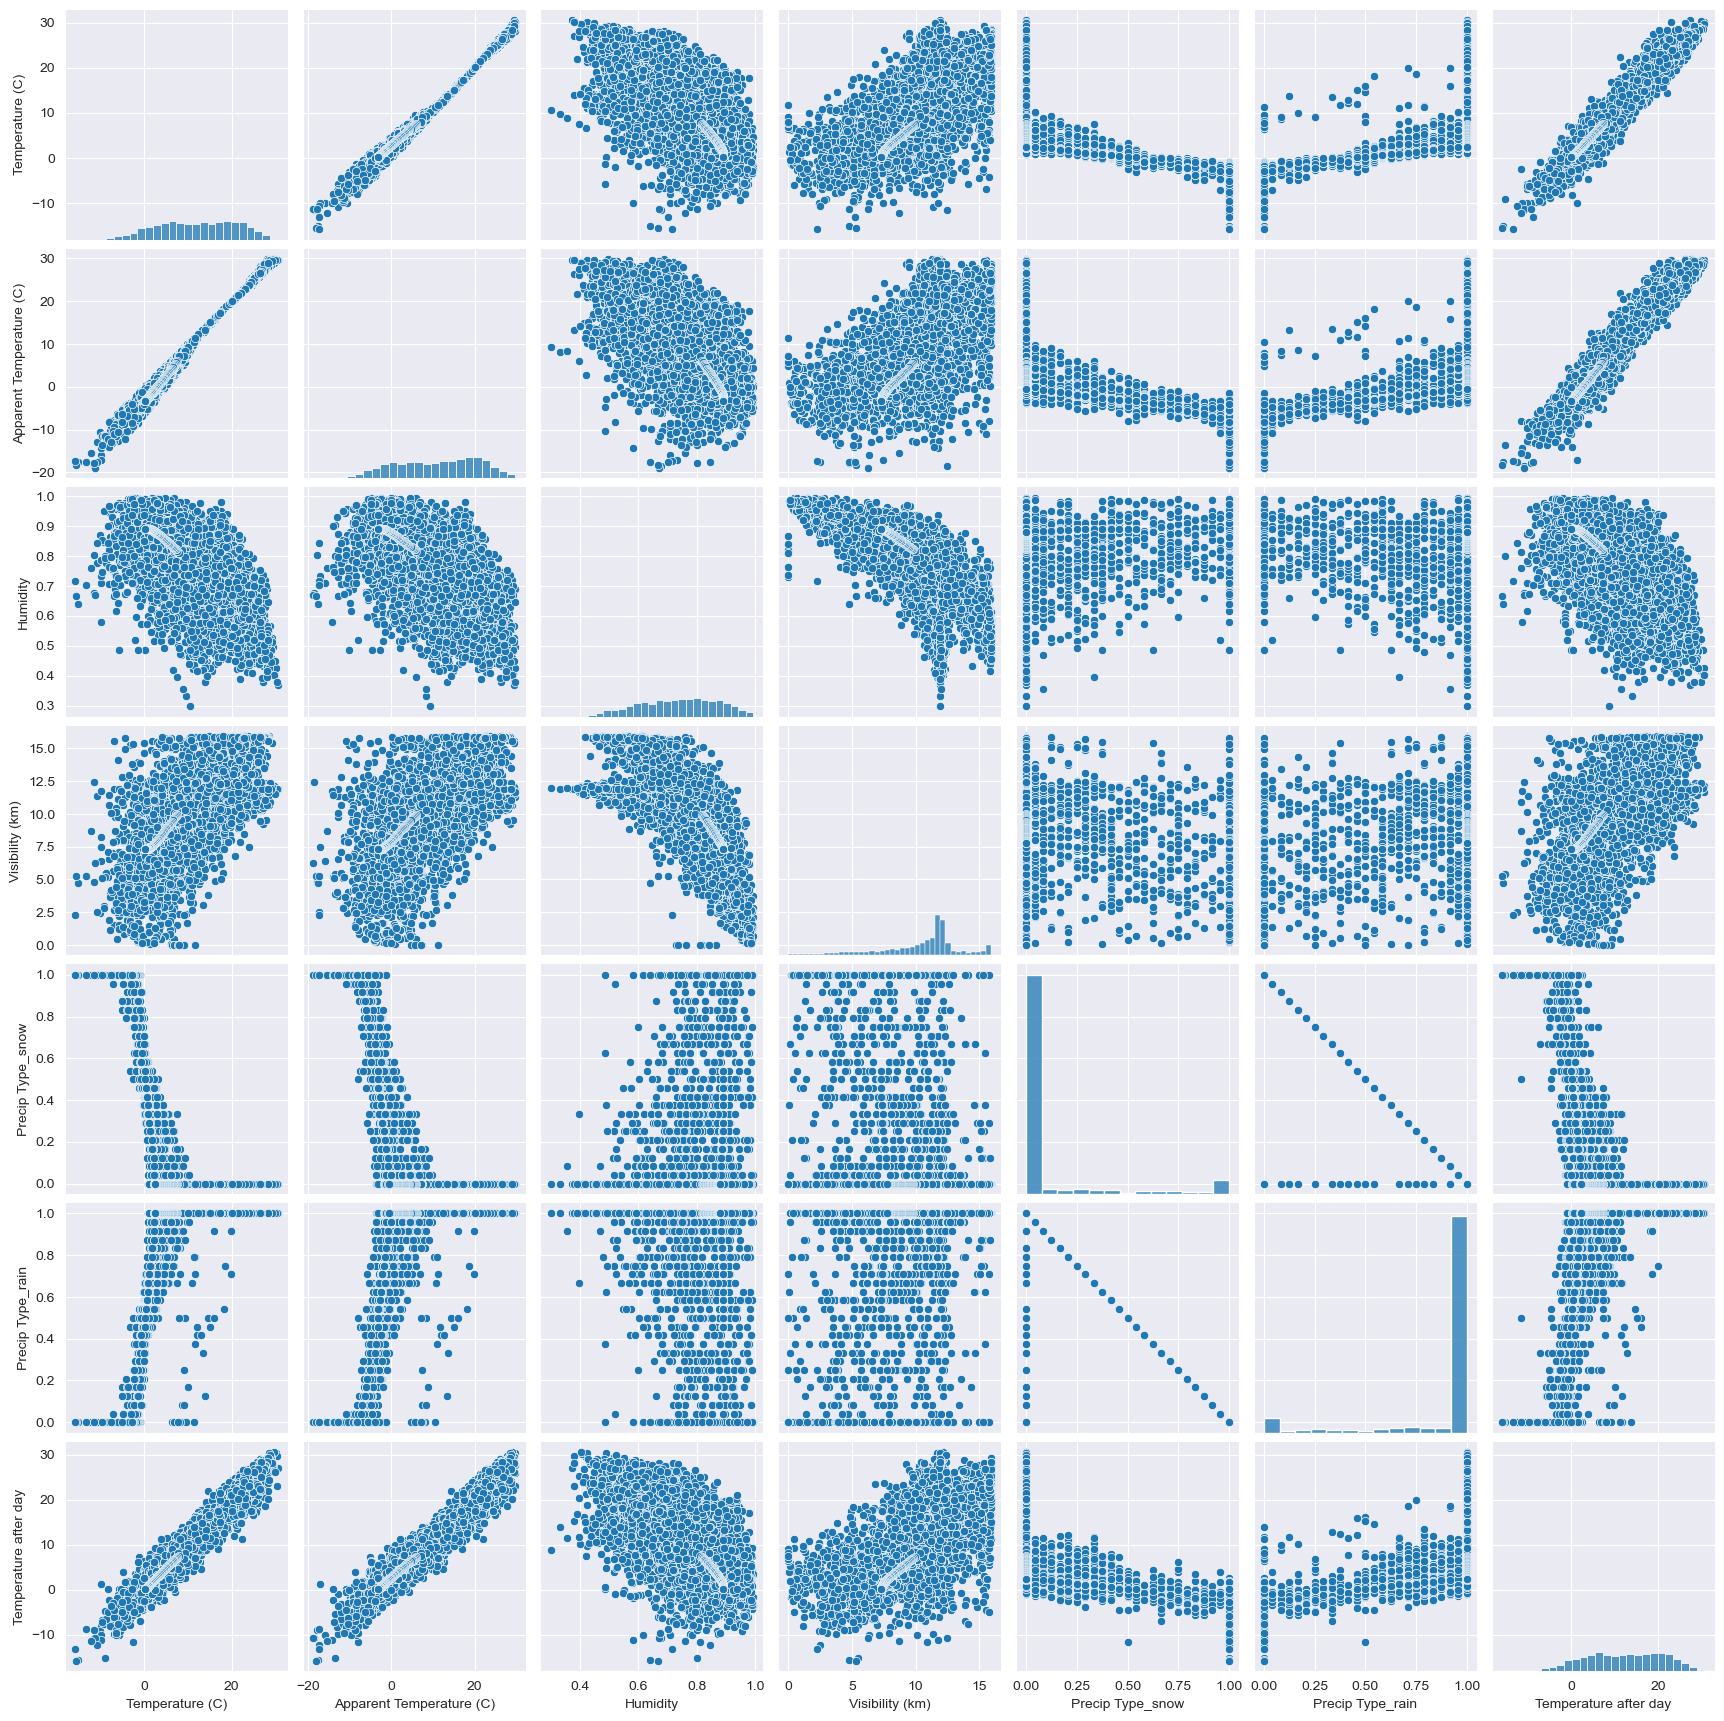

In [12]:
# Select features for linear regression analysis
lr_data = avg_day[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Visibility (km)', 'Precip Type_snow', 'Precip Type_rain', 'Temperature after day']]

# Create a pair plot to visualize the relationships between the selected features
sns.pairplot(lr_data, kind = 'scatter');

## Simple Linear Regression
Predict temperature using 'Temperature (C)'.

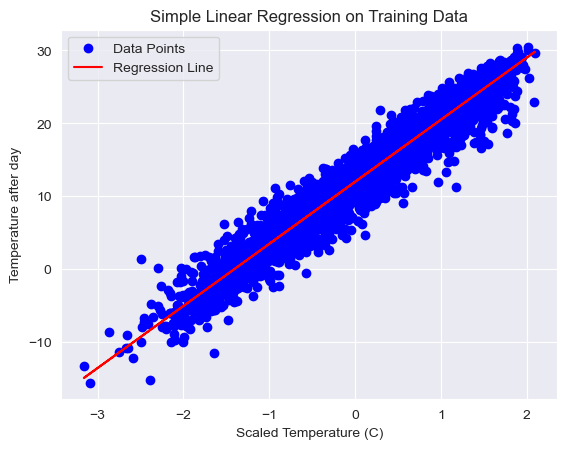

In [13]:
# Prepare the data for simple linear regression
x = lr_data.iloc[:, 0] # Temperature (C)
y = lr_data.iloc[:, -1] # Temperature after day

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape the training data to fit the model
X_train = X_train.values.reshape(-1, 1)

# Scale the training data
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

# Create and train the simple linear regression model
slr = LinearRegression()
slr.fit(X_train_scaled, y_train)

# Predict the temperature for the training data
y_train_pred = slr.predict(X_train_scaled)

# Plot the training data and the regression line
plt.scatter(X_train_scaled, y_train, color='blue', label='Data Points')
plt.plot(X_train_scaled.flatten(), y_train_pred, "-r", label='Regression Line')
plt.xlabel('Scaled Temperature (C)')
plt.ylabel('Temperature after day')
plt.title('Simple Linear Regression on Training Data')
plt.legend()
plt.show();

In [14]:
# Prepare the test data
X_test = X_test.values.reshape(-1, 1)
x_test_scaled = scale.transform(X_test)

# Predict the temperature for the test data
y_pred = slr.predict(x_test_scaled)

# Evaluate the model performance
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# Print the model coefficients and performance metrics
print("Coefficients:", slr.coef_)
print("Intercept:", slr.intercept_)
print("Mean Squared Error (MSE):", lr_mse)
print("R2 Score:", lr_r2)

Coefficients: [8.51020061]
Intercept: 11.979974065059912
Mean Squared Error (MSE): 4.287782735324082
R2 Score: 0.9442194337745915


## Multiple Linear Regression
Predict temperature using multiple features.

In [15]:
# Prepare the data for multiple linear regression
mlr_x = lr_data.iloc[:, :-1] # All features except 'Temperature after day'
mlr_y = lr_data.iloc[:, -1] # Temperature after day

# Split the data into training and testing sets
mlr_X_train, mlr_X_test, mlr_y_train, mlr_y_test = train_test_split(mlr_x, mlr_y, test_size=0.2, random_state=42)

# Create and train the multiple linear regression model
mlr = LinearRegression()
mlr.fit(mlr_X_train, mlr_y_train)

# Predict the temperature for the test data
mlr_y_pred = mlr.predict(mlr_X_test)

# Evaluate the model performance
mlr_mse = mean_squared_error(mlr_y_test, mlr_y_pred)
mlr_r2 = r2_score(mlr_y_test, mlr_y_pred)

# Print the model coefficients and performance metrics
print("Coefficients:", mlr.coef_)
print("Intercept:", mlr.intercept_)
print("Mean Squared Error (MSE):", mlr_mse)
print("R2 Score:", mlr_r2)

Coefficients: [ 0.71466796  0.22594444 -0.89277871 -0.00839073  0.72424067  0.39489587]
Intercept: 1.2574698872022676
Mean Squared Error (MSE): 4.223986617511821
R2 Score: 0.9450493693833233


## Compare Linear Regression Models
Compare the performance of simple and multiple linear regression.

In [16]:
# Create a table to compare the performance of simple and multiple linear regression
models = ["Multiple Linear Regression", "Simple Linear Regression"]
mse_values = [mlr_mse, lr_mse]
r2_values = [mlr_r2, lr_r2]

table = [
    [models[0], mse_values[0], r2_values[0]],
    [models[1], mse_values[1], r2_values[1]]
]
pd.DataFrame(table,columns=['Model', 'Mean Squared Error (MSE)', 'R2 Score'])

,Model,Mean Squared Error (MSE),R2 Score
0,Multiple Linear Regression,4.223987,0.945049
1,Simple Linear Regression,4.287783,0.944219


## Polynomial Regression
Explore non-linear relationships using polynomial features.

### Polynomial Regression (Degree 2)
Polynomial regression model with degree 2.

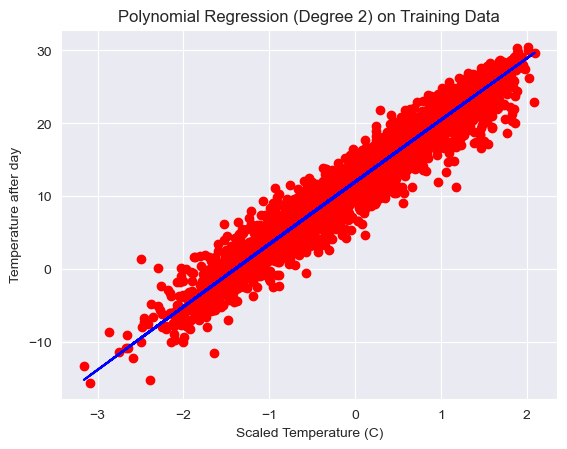

In [17]:
# Create a polynomial regression model with degree 2
pr_D2 = LinearRegression()
poly_reg_D2 = PolynomialFeatures(degree=2)

# Transform the scaled training data to include polynomial features
X_ply_D2 = poly_reg_D2.fit_transform(X_train_scaled)

# Train the polynomial regression model
pr_D2.fit(X_ply_D2, y_train)

# Plot the training data and the polynomial regression curve
plt.scatter(X_train_scaled, y_train, color = 'red')
plt.plot(X_train_scaled, pr_D2.predict(X_ply_D2), color = 'blue')
plt.xlabel('Scaled Temperature (C)')
plt.ylabel('Temperature after day')
plt.title('Polynomial Regression (Degree 2) on Training Data')
plt.show();

### Polynomial Regression (Degree 3)
Polynomial regression model with degree 3.

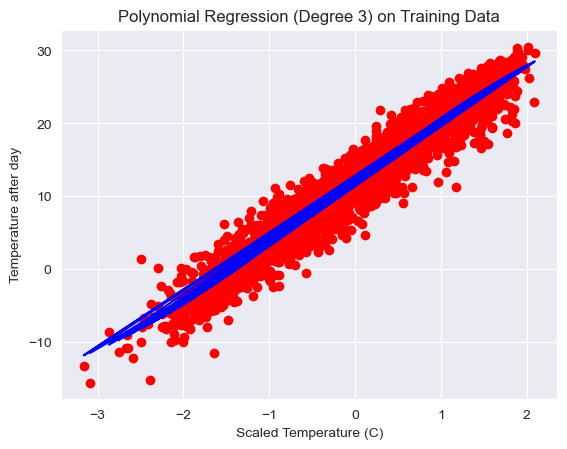

In [18]:
# Create a polynomial regression model with degree 3
pr_D3 = LinearRegression()
poly_reg_D3 = PolynomialFeatures(degree=3)

# Transform the scaled training data to include polynomial features
X_ply_D3 = poly_reg_D3.fit_transform(X_train_scaled)

# Train the polynomial regression model
pr_D3.fit(X_ply_D3, y_train)

# Plot the training data and the polynomial regression curve
plt.scatter(X_train_scaled, y_train, color = 'red')
plt.plot(X_train_scaled, pr_D3.predict(X_ply_D3), color = 'blue')
plt.xlabel('Scaled Temperature (C)')
plt.ylabel('Temperature after day')
plt.title('Polynomial Regression (Degree 3) on Training Data')
plt.show();

### Polynomial Regression (Degree 4)
Polynomial regression model with degree 4.

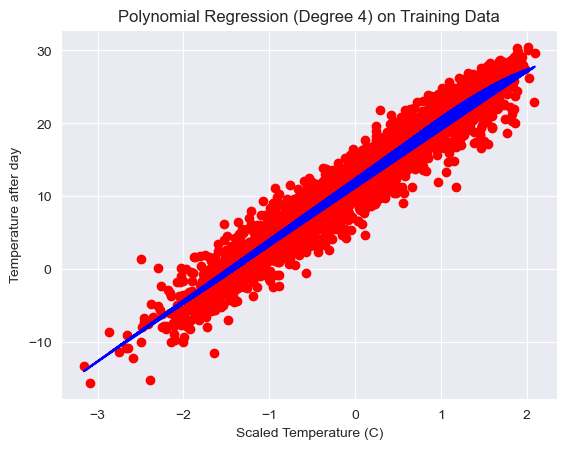

In [19]:
# Create a polynomial regression model with degree 4
pr_D4 = LinearRegression()
poly_reg_D4 = PolynomialFeatures(degree=4)

# Transform the scaled training data to include polynomial features
X_ply_D4 = poly_reg_D4.fit_transform(X_train_scaled)

# Train the polynomial regression model
pr_D4.fit(X_ply_D4, y_train)

# Plot the training data and the polynomial regression curve
plt.scatter(X_train_scaled, y_train, color = 'red')
plt.plot(X_train_scaled, pr_D4.predict(X_ply_D4), color = 'blue')
plt.xlabel('Scaled Temperature (C)')
plt.ylabel('Temperature after day')
plt.title('Polynomial Regression (Degree 4) on Training Data')
plt.show();

### Compare Polynomial Regression Models
Compare the performance of polynomial regression models.

In [20]:
# Evaluate the performance of the polynomial regression models on the test data

pr_D2_y_pred = pr_D2.predict(poly_reg_D2.fit_transform(x_test_scaled))
pr_D2_mse = mean_squared_error(y_test, pr_D2_y_pred)
pr_D2_r2 = r2_score(y_test, pr_D2_y_pred)

pr_D3_y_pred = pr_D3.predict(poly_reg_D3.fit_transform(x_test_scaled))
pr_D3_mse = mean_squared_error(y_test, pr_D3_y_pred)
pr_D3_r2 = r2_score(y_test, pr_D3_y_pred)

pr_D4_y_pred = pr_D4.predict(poly_reg_D4.fit_transform(x_test_scaled))
pr_D4_mse = mean_squared_error(y_test, pr_D4_y_pred)
pr_D4_r2 = r2_score(y_test, pr_D4_y_pred)

# Create a table to compare the performance of the polynomial regression models
models = ["Polynomial Regression degree 2", "Polynomial Regression degree 3", "Polynomial Regression degree 4"]
mse_values = [pr_D2_mse, pr_D3_mse, pr_D4_mse]
r2_values = [pr_D2_r2, pr_D3_r2, pr_D4_r2]

table = [
    [models[0], mse_values[0], r2_values[0]],
    [models[1], mse_values[1], r2_values[1]],
    [models[2], mse_values[2], r2_values[2]]
]
pd.DataFrame(table,columns=['Model', 'Mean Squared Error', 'R2 Score'])


,Model,Mean Squared Error,R2 Score
0,Polynomial Regression degree 2,4.293240,0.944148
1,Polynomial Regression degree 3,4.309399,0.943938
2,Polynomial Regression degree 4,4.304238,0.944005


## Conclusion
This project analyzed historical weather data and developed regression models to predict future temperatures.  The analysis included data cleaning, feature engineering, and model selection.  Multiple linear regression and polynomial regression models were evaluated.

The multiple linear regression model demonstrated the best performance with a Mean Squared Error (MSE) of 4.22 and an R-squared (R2) of 0.945.  This indicates that the model explains a large proportion of the variance in the temperature data and has a relatively low prediction error.  Polynomial regression models did not outperform the linear regression models.
